Import library that we used in this file

In [2]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Defined list of problem and contest index of each problem

In [3]:
listOfProblem= ['WebofLies','GregorandCryptography','PolycarpandCoins','WonderfulColoring','SubsequencePermutation','DigitsSum','RunningforGold',
'XORandDistance','Cherry','Cobb','Mikasa','AVarietyofOperations','EzzatandTwoSubsequences','MochaandMath','DislikeofThrees',
'SimplyStrangeSort','MedianMaximization','SeatingArrangementseasyversion','NonDecreasingDilemma','BalancedSubstring','Book',
'RegularBracketSequences']

nameMapProblem= {'WebofLies': '1549C','TheThreeLittlePigs': '1548C','GregorandtheTwoPainters': '1548E',
 'GregorandCryptography': '1549A','PolycarpandCoins': '1551A','WonderfulColoring': '1551B1',
 'SubsequencePermutation': '1552A','RunningforGold': '1552B','Backspace': '1553D','PermutationShift': '1553E',
 'DigitsSum': '1553A','XORandDistance': '1553H','Cherry': '1554A','Cobb': '1554B',
 'Mikasa': '1554C','SayNotoPalindromes': '1555D','AVarietyofOperations': '1556A','Moamenandksubarrays': '1557B',
 'EzzatandTwoSubsequences': '1557A','MochaandMath': '1559A','MochaandRedandBlue': '1559B','MochaandDianaEasyVersion': '1559D1',
 'DislikeofThrees': '1560A','InfinityTable': '1560C','NearestBeautifulNumbereasyversion': '1560F1','NearestBeautifulNumberhardversion': '1560F2',
 'SimplyStrangeSort': '1561A','ScenesFromaMemory': '1562B','SeatingArrangementseasyversion': '1566D1',
 'MINMEXCut': '1566B','MedianMaximization': '1566A','BudsRehanging': '1566E','NonDecreasingDilemma': '1567E',
 'BalancedSubstring': '1569A','Book': '1573C','Countdown': '1573A','RegularBracketSequences': '1574A',
 'CombinatoricsHomework': '1574B','MinimizeDistance': '1585C','MissingBigram': '1618B',
 "Singers'Tour": '1618E',"NewYear'sProblem": '1619D','GameonRanges': '1623B'}

We define 2 function. The propose of 2 function are 
1) ngrams function uses for make token to ngram
2) readFile function uses for read Code token and make token to trigram, Furthermore we added some condition we and '_,_' in the first trigram and '_,_' in the last trigram

In [4]:
def ngrams(tokens, n=3, sep= ', '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)]) if len([t for t in ngram])!=0]
def readFile(com_path):
    with open(com_path) as f:
        a= json.load(f)
        try:
            f0 = a['Files'][0]
            ftk = a['Files'][0]['Tokens']
            lstTk = [x['Text'] for x in ftk]
            lstTk.insert(0,'_')
            lstTk.insert(0,'_')
            lstTk.append('_')
            lstTk.append('_')
            trigram = ngrams(lstTk) 
        except:
            return []
    return trigram

After we tokenize and make each code into trigram.
We defind "mapAllCodeTokenEachProblem" to union all of trigram for each problem.

In [5]:
def mapAllCodeTokenEachProblem(lang,path):
    resUnion = {}
    resAlpha = {}
    # path ='/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/CPP'
    lst = os.listdir(path)
    for namee in lst:
        if(namee in listOfProblem):
            print(namee)
            unionFile = []
            # path = f"/home/sila-l/my_data/RealDataSet/{namee}/codeTokenC++/"
            tokenPath= f"{path}/{namee}/{namee}_Token_{lang.lower()}/"
            token_file = [x for x in os.listdir(tokenPath) if x.endswith(".json")]
            # print(token_file)
            for i in token_file:
                com_path = tokenPath+i
                # print(com_path)
                trigram = readFile(com_path)
                unionFile+=trigram
            resUnion[namee] = set(unionFile)
            alphaPath = f"{path}/{namee}/{lang.lower()}_fromAlpha_token.json"
            resAlpha[namee] = readFile(alphaPath)
    return resUnion,resAlpha



        

This step we want to find uniqueness between humancode and alpha. 
Using formule ( |trigrams(alphacode) - trigrams(all humancde) | / |trigrams(alphacode) | )
we find uniqueness in both Python and CPP language for each problem.moreover we also
filter out some outlier too.

In [6]:
allPython,allCpp = [],[]
perUnique = pd.DataFrame(columns={'Languages','Percentage of Unique'})
res2lang={}
#0(union All human code submision), 1(alphacode)
for l in ['CPP','PYTHON']:
    print(l)
    path =f'/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/{l}'
    res2lang[l] = mapAllCodeTokenEachProblem(l,path)

for i in listOfProblem:
        ogc = len(res2lang['CPP'][0][i])
        apc = len(res2lang['CPP'][1][i])
        ogp = len(res2lang['PYTHON'][0][i])
        app = len(res2lang['PYTHON'][1][i])
        apcMinusogc = sum([1 for x in res2lang['CPP'][1][i] if x not in res2lang['CPP'][0][i]])
        appMinusogp = sum([1 for x in res2lang['PYTHON'][1][i] if x not in res2lang['PYTHON'][0][i]])

        #filter outlier that
        if(appMinusogp/app*100 < 100):
                tmppython = appMinusogp/app*100
                allPython.append(tmppython)
                perUnique = perUnique.append({'Languages':"Python",'Percentage of Unique': appMinusogp/app*100},ignore_index=True)
        tmpCpp = apcMinusogc/apc*100
        allCpp.append(tmpCpp)
        perUnique = perUnique.append({'Languages':'C++','Percentage of Unique':apcMinusogc/apc*100},ignore_index=True)


CPP
NonDecreasingDilemma
GregorandCryptography
PolycarpandCoins
SimplyStrangeSort
MedianMaximization
DigitsSum
RunningforGold
RegularBracketSequences
WonderfulColoring
Cherry
Mikasa
WebofLies
MochaandMath
BalancedSubstring
Book
SeatingArrangementseasyversion
DislikeofThrees
EzzatandTwoSubsequences
AVarietyofOperations
XORandDistance
SubsequencePermutation
Cobb
PYTHON
NonDecreasingDilemma
GregorandCryptography
PolycarpandCoins
SimplyStrangeSort
MedianMaximization
DigitsSum
RunningforGold
RegularBracketSequences
WonderfulColoring
Cherry
Mikasa
WebofLies
MochaandMath
BalancedSubstring
Book
SeatingArrangementseasyversion
DislikeofThrees
EzzatandTwoSubsequences
AVarietyofOperations
XORandDistance
SubsequencePermutation
Cobb


/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_51371/20616643.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perUnique = perUnique.append({'Languages':"Python",'Percentage of Unique': appMinusogp/app*100},ignore_index=True)
/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_51371/20616643.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perUnique = perUnique.append({'Languages':'C++','Percentage of Unique':apcMinusogc/apc*100},ignore_index=True)
/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_51371/20616643.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perUnique = perUnique.append({'Languages':"Python",'Percentage of Unique': appMinusogp/app*100},ignore_index=True)
/var/folder

we visualize our result by using pandas dataframe.

In [7]:
resultUnique = pd.DataFrame(columns={'name','Mean','Median'})
arrPython = np.array(allPython)
arrCpp = np.array(allCpp)
resultUnique = resultUnique.append({'name':'C++','Mean':np.mean(arrCpp),'Median':np.median(arrCpp),'SD':np.std(arrCpp)},ignore_index=True)
resultUnique = resultUnique.append({'name':'Python','Mean':np.mean(arrPython),'Median':np.median(arrPython),'SD':np.std(arrPython)},ignore_index=True)

/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_51371/2220587958.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultUnique = resultUnique.append({'name':'C++','Mean':np.mean(arrCpp),'Median':np.median(arrCpp),'SD':np.std(arrCpp)},ignore_index=True)
/var/folders/l1/dlc_jzs90vj3g01l0jr_866w0000gn/T/ipykernel_51371/2220587958.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultUnique = resultUnique.append({'name':'Python','Mean':np.mean(arrPython),'Median':np.median(arrPython),'SD':np.std(arrPython)},ignore_index=True)


In [8]:
# Mean average sd of uniqueness of all problem in both python and c++
resultUnique

,Median,Mean,name,SD
0,2.60312,3.325605,C++,3.215842
1,3.243243,8.939178,Python,10.660768


In [9]:
#percentage of uniques for each problem in both python and C++
perUnique

,Languages,Percentage of Unique
0,Python,22.142857
1,C++,1.440922
2,Python,10.0
3,C++,0.0
4,Python,0.0
5,C++,11.363636
6,Python,4.464286
7,C++,0.0
8,Python,0.0
9,C++,0.0


In this step we also visualize the result in boxplot too.

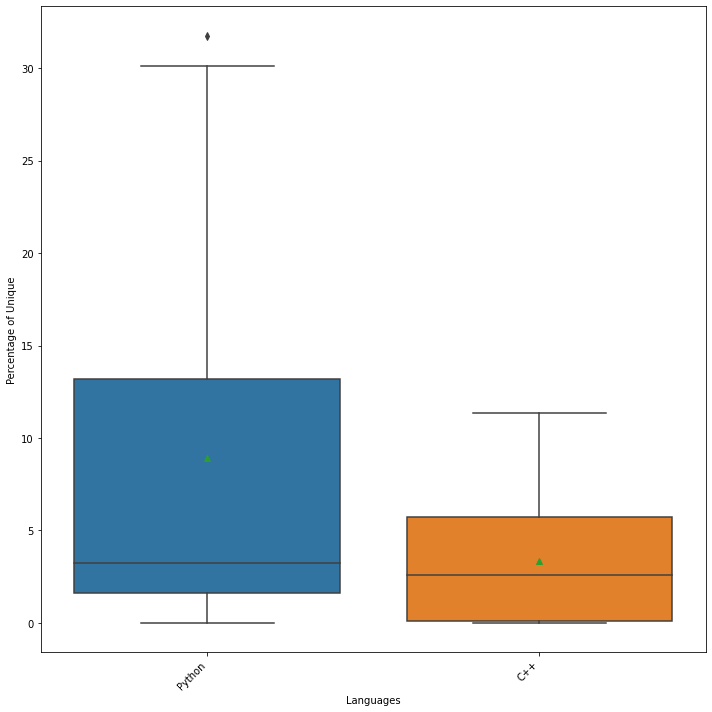

In [10]:



plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

sns_pp =  sns.boxplot(y='Percentage of Unique',x='Languages',data=perUnique,showmeans=True)
sns_pp.set_xticklabels(sns_pp.get_xticklabels(), rotation=45,horizontalalignment='right')
fig = sns_pp.get_figure()
fig.set_size_inches(10, 10)

# fig.savefig('uniqueeeeeeeeeee.pdf')
